# data proprecessing

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np

In [53]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
#from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

In [54]:
import tensorflow as tf

In [192]:
path = "data/restaurant_review/Restaurant reviews.csv"
df = pd.read_csv(path)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [194]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [195]:
df.isna().sum(axis=0)

Restaurant       0
Reviewer        38
Review          45
Rating          39
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

In [196]:
df = df.drop(columns = "7514")

In [197]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


In [198]:
df['Rating'].value_counts()

Rating
5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [199]:
df.loc[df["Rating"]>3,].shape

(6315, 7)

In [200]:
df.loc[df["Rating"]<=3,].shape

(3639, 7)

In [201]:
df.loc[df["Rating"] <= 2.5, "Rating"] = 0
df.loc[df["Rating"] > 2.5, "Rating"] = 1
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,1.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,1.0,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",0.0,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,1.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [202]:
df["Rating"].value_counts()

Rating
1.0    7507
0.0    2447
Name: count, dtype: int64

## NLP

Remove special characters, numbers and extra spaces from the text. Make text lowercase.

In [203]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [204]:
df['Review_clean'] = df['Review'].apply(clean_text)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,the ambience was good food was quite good had...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience is too good for a pleasant evening se...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,a must try great food great ambience thnx for ...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das and arun was a great guy only becau...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food is goodwe ordered kodi drumsticks and bas...


### removing the stopwords

In [205]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kwokt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['Review_clean'] = df['Review_clean'].apply(remove_stopwords)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch ...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodwe ordered kodi drumsticks basket mut...


In [207]:
# check if stopwords are removed
print(df['Review_clean'][0])

ambience good food quite good  saturday lunch  cost effective good place sate brunch one also chill friends parentswaiter soumen das really courteous helpful


### Remove word with no meaning (less than 3 characters) or nonsense words

In [208]:
# remove words with length less than 3
df['Review_clean'] = df['Review_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodwe ordered kodi drumsticks basket mut...


### Correct the spelling of the words

In [76]:
# import requests
# import zipfile
# from spello.model import SpellCorrectionModel

# # download the pre-trained zip file from https://haptik-website-images.haptik.ai/spello_models/en_large.pkl.zip
# # and unzip it to the current directory

# download_url = "https://haptik-website-images.haptik.ai/spello_models/en_large.pkl.zip"
# file_name = "data/en_large.pkl.zip"
# with open(file_name, "wb") as f:
#     f.write(requests.get(download_url).content)
    
# with zipfile.ZipFile(file_name, 'r') as zip_ref:
#     zip_ref.extractall()

# move the extracted file to the correct directory
# os.rename("en_large.pkl", "model/en_large.pkl")
    
# # remove the zip file
# os.remove(file_name)

In [209]:
from spello.model import SpellCorrectionModel

# load the model
spell_model = SpellCorrectionModel(language="en")
spell_model.load("model/en_large.pkl")

C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\spello\model.py:301: UserWarning: This model was saved on spell<1.3.0. As such due to a bug in previous versions, none of customisations made to the config at the time of training were saved along with the model. It is recommended to load the model, apply all required customizations to config and save it again. E.g.

from spello.model import SpellCorrectionModel 
sp = SpellCorrectionModel(language='en')  
sp.load('/home/ubuntu/model.pkl')
sp.config.min_length_for_spellcorrection = 4 # default is 3
sp.config.max_length_for_spellcorrection = 12 # default is 15
sp.save(model_save_dir='/home/ubuntu/')

After this the model will load without any warnings

  warnings.warn("This model was saved on spell<1.3.0. As such due to a bug in previous versions, "


In [210]:
# correct the spelling
def correct_spelling(text):
    corrected_text = spell_model.spell_correct(text)
    return corrected_text

df['Review_clean'] = df['Review_clean'].apply(correct_spelling)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,{'original_text': 'ambience good food quite go...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,{'original_text': 'ambience good pleasant even...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,{'original_text': 'must try great food great a...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,{'original_text': 'soumen das arun great guy b...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,{'original_text': 'food goodwe ordered kodi dr...


In [211]:
# unpack df['Review_clean'] to seperated columns, e.g. {'original': 'I love this restaurant', 'cleaned': 'love restaurant'}
# to columns 'original' and 'cleaned', respectively
df_1 = pd.DataFrame(df['Review_clean'].apply(pd.Series))
df_1.head()

,original_text,spell_corrected_text,correction_dict
0,ambience good food quite good saturday lunch c...,ambience good food quite good saturday lunch c...,{'soumen': 'suomen'}
1,ambience good pleasant evening service prompt ...,ambience good pleasant evening service prompt ...,"{'soumen': 'someone', 'kudos': 'kitts'}"
2,must try great food great ambience thnx servic...,must try great food great ambience thonx servi...,"{'thnx': 'thonx', 'pradeep': 'pradip', 'subrot..."
3,soumen das arun great guy behavior sincerety g...,simon das arun great guy behavior sincerity go...,"{'soumen': 'simon', 'sincerety': 'sincerity'}"
4,food goodwe ordered kodi drumsticks basket mut...,food god ordered kodai drumsticks basket mutto...,"{'goodwe': 'god', 'kodi': 'kodai', 'biryani': ..."


In [212]:
# concat df_1 with the original df, drop Review_clean, original_text, correction_dict, and rename spell_corrected_text to Review_clean
df = pd.concat([df, df_1], axis=1)
df = df.drop(columns = ['Review_clean', 'original_text', 'correction_dict'])
df = df.rename(columns = {'spell_corrected_text': 'Review_clean'})
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thonx servi...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,simon das arun great guy behavior sincerity go...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food god ordered kodai drumsticks basket mutto...


In [213]:
# export the cleaned data
df.to_csv('data/restaurant_review/Restaurant_reviews_.csv', index=False)

### Lemmatization

Lemmatize text in the dataset to its root form with treetagger.

In [214]:
import treetaggerwrapper as ttpw

In [ ]:
# # install treetagger language files
# # download the tagger package from https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/english-bnc.par.gz
# # and unzip it to: model/treetagger-python/lib
# import requests
# import gzip

# # request the download link
# download_url = "https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/data/english-bnc.par.gz"
# file_name = "data/english-bnc.par.gz"
# with open(file_name, "wb") as f:
#     f.write(requests.get(download_url).content)
    
# # unzip the gz file
# with gzip.open(file_name, 'rb') as f_in:
#     with open('model/treetagger-python/TreeTagger/lib', 'wb') as f_out:
#         f_out.write(f_in.read())
    
# # remove the zip file
# os.remove(file_name)

In [215]:
# read the cleaned data first
import pandas as pd

df = pd.read_csv('data/restaurant_review/Restaurant_reviews_.csv')
df['Review_clean'] = df['Review_clean'].astype(str)

In [216]:
# tree tagger 'Review_clean' column with treetaggerwrapper
tags = ttpw.TreeTagger(TAGLANG='en', TAGDIR="model/treetagger-python/TreeTagger/")
df['Review_clean_lemma'] = df['Review_clean'].apply(tags.tag_text)
df['Review_clean_lemma']

0       [ambience\tNN1\tambience, good\tAJ0\tgood, foo...
1       [ambience\tNN1\tambience, good\tAJ0\tgood, ple...
2       [must\tVM0\tmust, try\tVVI\ttry, great\tAJ0\tg...
3       [simon\tNN1\tsimon, das\tNP0\tdas, arun\tAJ0\t...
4       [food\tNN1\tfood, god\tNN1\tgod, order\tNN1\to...
                              ...                        
9949    [madhubani\tAJ0\tmadhubani, mahayana\tNN1\tmah...
9950    [place\tNN1\tplace, never\tAV0\tnever, disappo...
9951    [bad\tAJ0\tbad, rating\tNN1\trating, mainly\tA...
9952    [personally\tAV0\tpersonally, love\tVVB\tlove,...
9953    [check\tVVB\tcheck, try\tVVB\ttry, delicious\t...
Name: Review_clean_lemma, Length: 9954, dtype: object

In [217]:
# remove tags and original text and the middle column
df['Review_clean_lemma'] = df['Review_clean_lemma'].apply(lambda x: [i.split('\t')[2] for i in x])
df['Review_clean_lemma']

0       [ambience, good, food, quite, good, saturday, ...
1       [ambience, good, pleasant, evening, service, p...
2       [must, try, great, food, great, ambience, thon...
3       [simon, das, arun, great, guy, behavior, since...
4       [food, god, order, kodai, drumstick, basket, m...
                              ...                        
9949    [madhubani, mahayana, well, start, nice, court...
9950    [place, never, disappoint, food, courteous, st...
9951    [bad, rating, mainly, chicken, bone, find, veg...
9952    [personally, love, prefer, chinese, food, coup...
9953    [check, try, delicious, chinese, food, see, no...
Name: Review_clean_lemma, Length: 9954, dtype: object

In [218]:
# export the lemmatized data
df.to_csv('data/restaurant_review/Restaurant_reviews_cleaned.csv', index=False)

In [147]:
# read the cleaned data again
df = pd.read_csv('data/restaurant_review/Restaurant_reviews_cleaned.csv')

df['Review_clean'] = df['Review_clean'].astype(str)
df['Review_clean']

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thonx servi...
3       simon das arun great guy behavior sincerity go...
4       food god order kodai drumstick basket mutton b...
                              ...                        
9949    madhubani mahayana well start nice courteous s...
9950    place never disappoint food courteous staff se...
9951    bad rating mainly chicken bone find veg food a...
9952    personally love prefer chinese food couple tim...
9953    check try delicious chinese food see novel lun...
Name: Review_clean, Length: 9954, dtype: object

In [220]:
# replace the original 'Review_clean' column with the lemmatized one
df['Review_clean'] = df['Review_clean_lemma']
df = df.drop(columns = 'Review_clean_lemma')

# export the lemmatized data
df.to_csv('data/restaurant_review/Restaurant_reviews_cleaned.csv', index=False)

In [ ]:
# remove words which are not in the English dictionary
import nltk
nltk.download('words')
from nltk.corpus import words

In [224]:
def remove_non_english_words(text):
    text = ' '.join(word for word in text if word in words.words())
    print(text)
    return text

df['Review_clean'] = df['Review_clean'].apply(remove_non_english_words)
df.head()

ambience good food quite good lunch cost effective good place sate brunch one also chill friend das really courteous helpful
ambience good pleasant evening service prompt food good good experience someone das service
must try great food great ambience service support personal recommendation also music background amazing
das great guy behavior sincerity good food course would like visit place
food god order drumstick basket mutton good thanks serve well enjoy ambience also good
good service good food spare good service good papaya good hostess caption good restaurant
nice place ambience different food order tasty service also good worth visit reasonable well really must visit place
well read many review finally visit good come food crispy corn nice the fish basket disappointed flattering claim staff polite prompt especially
excellent food specially like spicy food courteous staff pope give excellent service corporate team dinner overall great team dinner party
come birthday treat close 

### Target encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Rating'])

df['Rating_encoded'] = le.transform(df['Rating'])
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean,Rating_encoded
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambienc good food quit good saturday lunch c...,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambienc good pleasant even servic prompt food ...,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must tri great food great ambienc thnx servic ...,1
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincereti g...,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodw order kodi drumstick basket mutton ...,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      9954 non-null   object 
 1   Reviewer        9954 non-null   object 
 2   Review          9954 non-null   object 
 3   Rating          9954 non-null   float64
 4   Metadata        9954 non-null   object 
 5   Time            9954 non-null   object 
 6   Pictures        9954 non-null   int64  
 7   Review_clean    9954 non-null   object 
 8   Rating_encoded  9954 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.0+ MB


### Tokens visualization

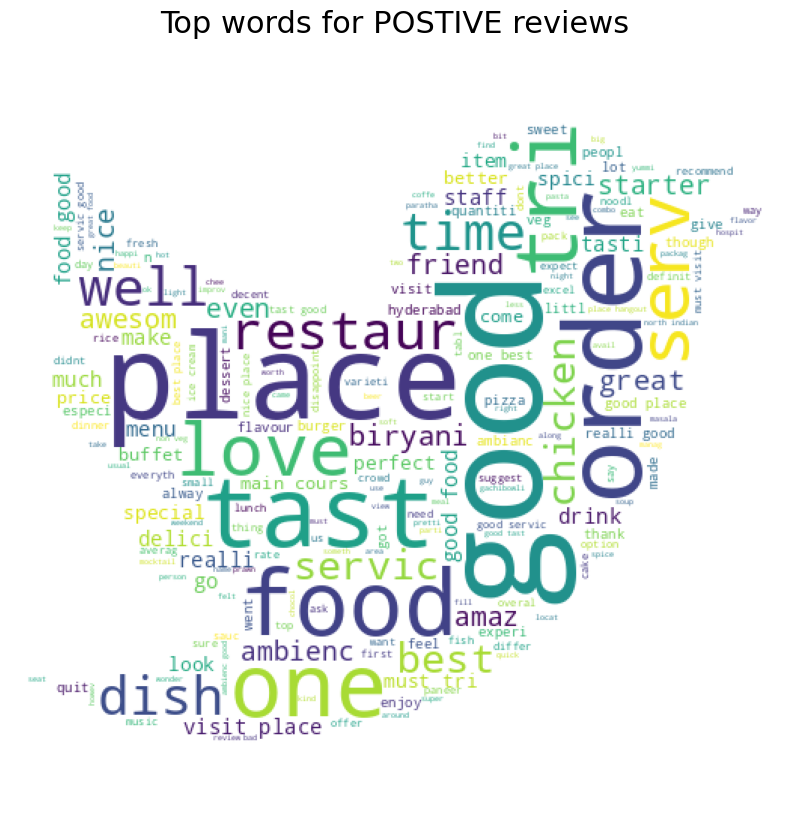

In [22]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/COM6101/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['Rating_encoded'] == 1, 'Review_clean']))
plt.figure(figsize=(18,10))
plt.title('Top words for POSTIVE reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

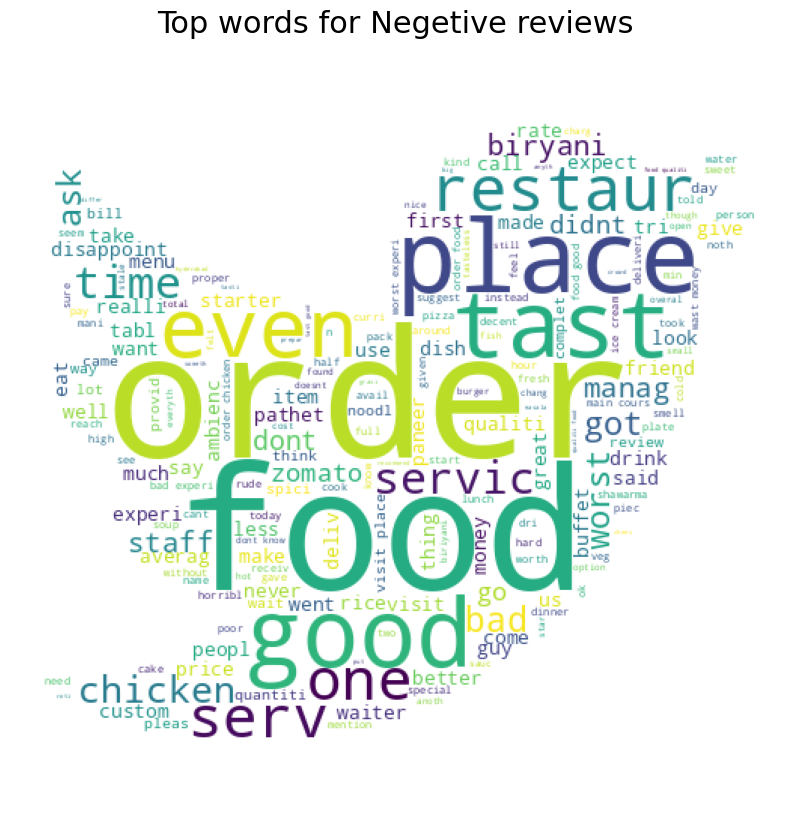

In [23]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/COM6101/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['Rating_encoded'] == 0, "Review_clean"]))
plt.figure(figsize=(18,10))
plt.title('Top words for Negetive reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

Vectorization

In [24]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['Review_clean']
y = df['Rating_encoded']

print(len(x), len(y))

9954 9954


In [25]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7465 7465
2489 2489


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [27]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

Tunning CountVectorizer

In [28]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2),
                              min_df=0.1, max_df=0.7, max_features=100)

TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<7465x16802 sparse matrix of type '<class 'numpy.float64'>'
	with 170923 stored elements in Compressed Sparse Row format>

Word Embeddings: GloVe

In [30]:
texts = df['Review_clean']
target = df['Rating_encoded']

In [31]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

21241

Pad_sequences

In [32]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [33]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequence, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[ 15,   1,   3, ...,   0,   0,   0],
       [ 15,   1, 533, ...,   0,   0,   0],
       [ 34,  10,  12, ...,   0,   0,   0],
       ...,
       [ 47, 124,  57, ...,   0,   0,   0],
       [153,  21, 375, ...,   0,   0,   0],
       [394,  10,  59, ...,   0,   0,   0]], dtype=int32)

GloVe

In [36]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [37]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.030769  ,  0.11993   ,  0.53908998, ..., -0.52877998,
         0.17584001,  1.06500006],
       [-0.24506   ,  0.04481   ,  0.32789999, ...,  0.16635001,
         0.40259001,  0.3766    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Modeling

In [38]:
import plotly.figure_factory as ff

x_axes = ['positive', 'negative']
y_axes =  ['negative', 'positive']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [39]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

Naive Bayes DTM

In [40]:
# Make class anf probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [41]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.8899156287665729


In [42]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9252095639070782

Naive Bayes

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [44]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.7934913619927682


XGBoost

In [45]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [46]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9225720026791695
Test: 0.8754519887505022


LSTM

In [47]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    target,
    test_size=0.25
)

In [48]:

def glove_lstm():
    model = Sequential()

    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights = [embedding_matrix],
        input_length=length_long_sentence
    ))

    model.add(Bidirectional(LSTM(
        length_long_sentence,
        return_sequences = True,
        recurrent_dropout=0.2
    )))

    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 539, 100)          2124100   
                                                                 
 bidirectional (Bidirection  (None, 539, 1078)         2759680   
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 1078)              0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 1078)              4312      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1078)              0         
                                                        

In [ ]:
# Load the model and train

model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    verbose = 1,
    patience = 5,
    min_lr = 0.001
)
history = model.fit(
    X_train,
    y_train,
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
143/234 [=================>............] - ETA: 41:56 - loss: 0.5624 - accuracy: 0.7830

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_learning_curves(history, metrics):
    for metric in metrics:
        plt.plot(history.history[metric], label=metric)
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_learning_curves(history, ['loss', 'accuracy'])

In [ ]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix(metrics.confusion_matrix(y_test, y_preds))

In [ ]:


# https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/274717
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold

from IPython.display import display

DEBUG = False
TRAIN_MODEL = False
INFER_TEST = True
ONE_FOLD_ONLY = True
COMPUTE_LSTM_IMPORTANCE = True

In [ ]:
EPOCH = 300
BATCH_SIZE = 1024
NUM_FOLDS = 10

# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# GET GPU STRATEGY
gpu_strategy = tf.distribute.get_strategy()

with gpu_strategy.scope():
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=2021)
    test_preds = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
        K.clear_session()

        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]

        checkpoint_filepath = f"folds{fold}.hdf5"
        if TRAIN_MODEL:
            model = keras.models.Sequential([
                keras.layers.Input(shape=train.shape[-2:]),
                keras.layers.Bidirectional(keras.layers.LSTM(1024, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
                keras.layers.Dense(128, activation='selu'),
                keras.layers.Dense(1),
            ])
            model.compile(optimizer="adam", loss="mae")

            lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1)
            es = EarlyStopping(monitor="val_loss", patience=60, verbose=1, mode="min", restore_best_weights=True)
            sv = keras.callbacks.ModelCheckpoint(
                checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                save_weights_only=False, mode='auto', save_freq='epoch',
                options=None
            )
            model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[lr, es, sv])

        else:
            model = keras.models.load_model('../input/finetune-of-tensorflow-bidirectional-lstm/'+checkpoint_filepath)

        if INFER_TEST:
            print(' Predicting test data...')
            test_preds.append(model.predict(test,verbose=0).squeeze().reshape(-1, 1).squeeze())

        if COMPUTE_LSTM_IMPORTANCE:
            results = []
            print(' Computing LSTM feature importance...')

            # COMPUTE BASELINE (NO SHUFFLE)
            oof_preds = model.predict(X_valid, verbose=0).squeeze()
            baseline_mae = np.mean(np.abs( oof_preds-y_valid ))
            results.append({'feature':'BASELINE','mae':baseline_mae})

            for k in tqdm(range(len(COLS))):

                # SHUFFLE FEATURE K
                save_col = X_valid[:,:,k].copy()
                np.random.shuffle(X_valid[:,:,k])

                # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
                oof_preds = model.predict(X_valid, verbose=0).squeeze()
                mae = np.mean(np.abs( oof_preds-y_valid ))
                results.append({'feature':COLS[k],'mae':mae})
                X_valid[:,:,k] = save_col

            # DISPLAY LSTM FEATURE IMPORTANCE
            print()
            df = pd.DataFrame(results)
            df = df.sort_values('mae')
            plt.figure(figsize=(10,20))
            plt.barh(np.arange(len(COLS)+1),df.mae)
            plt.yticks(np.arange(len(COLS)+1),df.feature.values)
            plt.title('LSTM Feature Importance',size=16)
            plt.ylim((-1,len(COLS)+1))
            plt.plot([baseline_mae,baseline_mae],[-1,len(COLS)+1], '--', color='orange',
                     label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
            plt.xlabel(f'Fold {fold+1} OOF MAE with feature permuted',size=14)
            plt.ylabel('Feature',size=14)
            plt.legend()
            plt.show()

            # SAVE LSTM FEATURE IMPORTANCE
            df = df.sort_values('mae',ascending=False)
            df.to_csv(f'lstm_feature_importance_fold_{fold+1}.csv',index=False)

        # ONLY DO ONE FOLD
        if ONE_FOLD_ONLY: break

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# 模拟注意力权重
attention_weights = np.random.rand(len(y_test), X_test.shape[1])  # 注意力权重为随机值

# 绘制热力图
plt.figure(figsize=(10, 5))
sns.heatmap(attention_weights, cmap='hot', annot=True, fmt=".2f")
plt.xlabel('输入序列')
plt.ylabel('输出序列')
plt.title('模拟注意力权重热力图')

# 设置横轴和纵轴标签
plt.xticks(np.arange(X_test.shape[1]), range(X_test.shape[1]))
plt.yticks(np.arange(len(y_test)), y_test)

plt.show()
